In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('BO_NEW.csv')

In [3]:
df.head()

,Wholesaler ID,Date of Purchase,Month,Product Type,Capacity (ml),Quantity Purchased,ZIP,City,Manager ID,Manager Name,Q3 - 2020 Goals
0,R00014,01-01-2020,31-01-2020,Pulp Orange 250ml,250ml,28,36000198,Durgapur,10014,Taran S,170000
1,R00015,01-01-2020,31-01-2020,Pulp Orange 1000ml,1000ml,111,36450915,Gangtok,10015,Rahul S,235000
2,R00016,01-01-2020,31-01-2020,Pulp Orange 500ml,500ml,28,38041001,Goa,10016,Kirti S,145000
3,R00018,01-01-2020,31-01-2020,Pulp Orange 1000ml,1000ml,34,39058313,Chennai,10018,Ankit J,180000
4,R00022,01-01-2020,31-01-2020,Pulp Orange 1000ml,1000ml,36,41145792,Amritsar,10012,Kalpana K,200000


In [4]:
df_new = df.copy()

## Convert datatype of month to date

In [5]:
df['Month'] = df.Month.astype('datetime64')

In [6]:
df.iloc[(1,2)].month

1

In [7]:
df['Quarter'] = [(((ele.month - 1)//3) + 1) for ele in df.Month]

In [8]:
df.tail()

,Wholesaler ID,Date of Purchase,Month,Product Type,Capacity (ml),Quantity Purchased,ZIP,City,Manager ID,Manager Name,Q3 - 2020 Goals,Quarter
4561,R00038,30-09-2020,2020-09-30,Pulp Orange 250ml,250ml,410,70003873,Chennai,10018,Ankit J,180000,3
4562,R00041,30-09-2020,2020-09-30,Pulp Orange 250ml,250ml,240,73401300,Agra,10011,Rakesh S,170000,3
4563,R00043,30-09-2020,2020-09-30,Pulp Orange 1000ml,1000ml,1160,75109301,Chandigarh,10013,Ram S,225000,3
4564,R00044,30-09-2020,2020-09-30,Pulp Orange 250ml,250ml,680,75200141,Durgapur,10014,Taran S,170000,3
4565,R00045,30-09-2020,2020-09-30,Pulp Orange 500ml,500ml,1170,76901001,Gangtok,10015,Rahul S,235000,3


In [9]:
df.columns

Index(['Wholesaler ID', 'Date of Purchase', 'Month', 'Product Type',
       'Capacity (ml)', 'Quantity Purchased', 'ZIP', 'City', 'Manager ID',
       'Manager Name', 'Q3 - 2020 Goals', 'Quarter'],
      dtype='object')

In [10]:
int(df.iloc[1,4].split('m')[0])

1000

In [11]:
df["Standard Unit"] = [int(ele.split('m')[0])/500 for ele in df['Capacity (ml)']]

In [12]:
df['Standard Unit'] = df["Standard Unit"]*df['Quantity Purchased']

In [13]:
df.head()

,Wholesaler ID,Date of Purchase,Month,Product Type,Capacity (ml),Quantity Purchased,ZIP,City,Manager ID,Manager Name,Q3 - 2020 Goals,Quarter,Standard Unit
0,R00014,01-01-2020,2020-01-31,Pulp Orange 250ml,250ml,28,36000198,Durgapur,10014,Taran S,170000,1,14.0
1,R00015,01-01-2020,2020-01-31,Pulp Orange 1000ml,1000ml,111,36450915,Gangtok,10015,Rahul S,235000,1,222.0
2,R00016,01-01-2020,2020-01-31,Pulp Orange 500ml,500ml,28,38041001,Goa,10016,Kirti S,145000,1,28.0
3,R00018,01-01-2020,2020-01-31,Pulp Orange 1000ml,1000ml,34,39058313,Chennai,10018,Ankit J,180000,1,68.0
4,R00022,01-01-2020,2020-01-31,Pulp Orange 1000ml,1000ml,36,41145792,Amritsar,10012,Kalpana K,200000,1,72.0


In [14]:
df_1 = df.groupby(['Manager Name','Quarter']).agg({'Standard Unit': 'sum'})

In [15]:
df_1

Standard Unit
Manager Name Quarter               
Abhishek S   1              12776.0
             2              28226.0
             3             170650.0
Ankit J      1               7627.5
             2              19946.5
             3              98530.0
Kalpana K    1              11664.5
             2              23003.5
             3             182280.0
Kirti S      1              27009.5
             2              56298.5
             3             305555.0
Rahul S      1              11744.5
             2              33314.0
             3             957165.0
Rakesh S     1               7526.5
             2              16809.0
             3             100360.0
Ram S        1              14902.5
             2              29748.0
             3             196635.0
Taran S      1              11229.5
             2              24263.0
             3             137595.0
Vishwa P     1              20783.0
             2              31765.5
             3             179125.0

In [16]:
df_1[]

SyntaxError: invalid syntax (Temp/ipykernel_25228/2819901715.py, line 1)

In [17]:
    df_2 = df[df.Quarter == 3].groupby(['Manager ID']).agg({'Standard Unit': 'sum'})

In [18]:
df_2_new = df.groupby(['Manager ID','Quarter']).agg({'Standard Unit':'sum'})
df_2_new

Standard Unit
Manager ID Quarter               
10011      1               7526.5
           2              16809.0
           3             100360.0
10012      1              11664.5
           2              23003.5
           3             182280.0
10013      1              14902.5
           2              29748.0
           3             196635.0
10014      1              11229.5
           2              24263.0
           3             137595.0
10015      1              11744.5
           2              33314.0
           3             957165.0
10016      1              12475.5
           2              25106.5
           3             125150.0
10017      1              20783.0
           2              31765.5
           3             179125.0
10018      1               7627.5
           2              19946.5
           3              98530.0
10019      1              14534.0
           2              31192.0
           3             180405.0
10020      1              12776.0
           2              28226.0
           3             170650.0

In [19]:
df_2

,Standard Unit
Manager ID,
10011,100360.0
10012,182280.0
10013,196635.0
10014,137595.0
10015,957165.0
10016,125150.0
10017,179125.0
10018,98530.0
10019,180405.0


In [20]:
df_target = pd.read_csv('target.csv')

In [21]:
df_target.drop(['Unnamed: 4'], axis = 1 ,inplace = True)

In [58]:
df_target

,Manager ID,Manager Name,City,Q3 - 2020 Goals (SU)
0,10015,Rahul S,Gangtok,"2,35,000"
1,10019,Kirti S,Coimbatore,"1,60,000"
2,10017,Vishwa P,Mumbai,"1,90,000"
3,10012,Kalpana K,Amritsar,"2,00,000"
4,10013,Ram S,Chandigarh,"2,25,000"
5,10016,Kirti S,Goa,"1,45,000"
6,10014,Taran S,Durgapur,"1,70,000"
7,10020,Abhishek S,Hyderabad,"2,50,000"
8,10011,Rakesh S,Agra,"1,70,000"
9,10018,Ankit J,Chennai,"1,80,000"


In [23]:
df_required = df_target.join(df_2, how = 'inner', on = 'Manager ID')

In [24]:
df_required

,Manager ID,Manager Name,City,Q3 - 2020 Goals (SU),Standard Unit
0,10015,Rahul S,Gangtok,"2,35,000",957165.0
1,10019,Kirti S,Coimbatore,"1,60,000",180405.0
2,10017,Vishwa P,Mumbai,"1,90,000",179125.0
3,10012,Kalpana K,Amritsar,"2,00,000",182280.0
4,10013,Ram S,Chandigarh,"2,25,000",196635.0
5,10016,Kirti S,Goa,"1,45,000",125150.0
6,10014,Taran S,Durgapur,"1,70,000",137595.0
7,10020,Abhishek S,Hyderabad,"2,50,000",170650.0
8,10011,Rakesh S,Agra,"1,70,000",100360.0
9,10018,Ankit J,Chennai,"1,80,000",98530.0


In [25]:
lii = [[li + '' for li in ele.split(',')] for ele in df_required['Q3 - 2020 Goals (SU)']]

In [26]:
list = []
for ele in lii:
    str = ''
    for k in ele:
        str = str + k
    list.append(int(str))    
        
        

In [27]:
df_required['Q3 - 2020 Goals (SU)'] = list

In [28]:
df_required['ratio'] = df_required['Standard Unit']/df_required['Q3 - 2020 Goals (SU)']

In [29]:
df_required

,Manager ID,Manager Name,City,Q3 - 2020 Goals (SU),Standard Unit,ratio
0,10015,Rahul S,Gangtok,235000,957165.0,4.073043
1,10019,Kirti S,Coimbatore,160000,180405.0,1.127531
2,10017,Vishwa P,Mumbai,190000,179125.0,0.942763
3,10012,Kalpana K,Amritsar,200000,182280.0,0.911400
4,10013,Ram S,Chandigarh,225000,196635.0,0.873933
5,10016,Kirti S,Goa,145000,125150.0,0.863103
6,10014,Taran S,Durgapur,170000,137595.0,0.809382
7,10020,Abhishek S,Hyderabad,250000,170650.0,0.682600
8,10011,Rakesh S,Agra,170000,100360.0,0.590353
9,10018,Ankit J,Chennai,180000,98530.0,0.547389


## Finding Quarter wise sales

In [33]:
df_quarter_3 = df[df.Quarter == 3].loc[:,['Manager ID', 'Manager Name', 'City', 'Standard Unit']]

In [34]:
df_quarter_3.head()

,Manager ID,Manager Name,City,Standard Unit
3257,10013,Ram S,Chandigarh,800.0
3258,10017,Vishwa P,Mumbai,390.0
3259,10017,Vishwa P,Mumbai,575.0
3260,10012,Kalpana K,Amritsar,940.0
3261,10013,Ram S,Chandigarh,1100.0


In [35]:
q3 = df_quarter_3.groupby(['Manager ID']).agg({'Standard Unit': 'sum'})

In [36]:
q3.head()

,Standard Unit
Manager ID,
10011,100360.0
10012,182280.0
10013,196635.0
10014,137595.0
10015,957165.0


In [37]:
q3.rename(columns = {'Standard Unit': 'Q3 Sales'}, inplace = True)

In [39]:
q3

,Q3 Sales
Manager ID,
10011,100360.0
10012,182280.0
10013,196635.0
10014,137595.0
10015,957165.0
10016,125150.0
10017,179125.0
10018,98530.0
10019,180405.0


### Finding 1st quarter sales

In [40]:
df_quarter_1 = df[df.Quarter == 1].loc[:,['Manager ID','Standard Unit']]

In [41]:
q1 = df_quarter_1.groupby(['Manager ID']).agg({'Standard Unit': 'sum'})

In [42]:
q1

,Standard Unit
Manager ID,
10011,7526.5
10012,11664.5
10013,14902.5
10014,11229.5
10015,11744.5
10016,12475.5
10017,20783.0
10018,7627.5
10019,14534.0


In [43]:
q1.rename(columns = {'Standard Unit': 'Q1 Sales'}, inplace = True)

### Finding for Q2

In [44]:
df_quarter_2 = df[df.Quarter == 2].loc[:,['Manager ID','Standard Unit']]
q2 = df_quarter_2.groupby(['Manager ID']).agg({'Standard Unit': 'sum'})
q2.rename(columns = {'Standard Unit': 'Q2 Sales'}, inplace = True)

In [45]:
q2

,Q2 Sales
Manager ID,
10011,16809.0
10012,23003.5
10013,29748.0
10014,24263.0
10015,33314.0
10016,25106.5
10017,31765.5
10018,19946.5
10019,31192.0


In [53]:
new_dff = q1.join(q2, how = 'inner', on = 'Manager ID')

In [55]:
new_dff = new_dff.join(q3, how = 'inner', on = 'Manager ID')

In [56]:
alter = new_dff.copy()

In [57]:
alter

,Q1 Sales,Q2 Sales,Q3 Sales
Manager ID,,,
10011,7526.5,16809.0,100360.0
10012,11664.5,23003.5,182280.0
10013,14902.5,29748.0,196635.0
10014,11229.5,24263.0,137595.0
10015,11744.5,33314.0,957165.0
10016,12475.5,25106.5,125150.0
10017,20783.0,31765.5,179125.0
10018,7627.5,19946.5,98530.0
10019,14534.0,31192.0,180405.0


In [59]:
df_require = df_target.join(alter, how = 'inner', on = 'Manager ID')

In [60]:
df_require

,Manager ID,Manager Name,City,Q3 - 2020 Goals (SU),Q1 Sales,Q2 Sales,Q3 Sales
0,10015,Rahul S,Gangtok,"2,35,000",11744.5,33314.0,957165.0
1,10019,Kirti S,Coimbatore,"1,60,000",14534.0,31192.0,180405.0
2,10017,Vishwa P,Mumbai,"1,90,000",20783.0,31765.5,179125.0
3,10012,Kalpana K,Amritsar,"2,00,000",11664.5,23003.5,182280.0
4,10013,Ram S,Chandigarh,"2,25,000",14902.5,29748.0,196635.0
5,10016,Kirti S,Goa,"1,45,000",12475.5,25106.5,125150.0
6,10014,Taran S,Durgapur,"1,70,000",11229.5,24263.0,137595.0
7,10020,Abhishek S,Hyderabad,"2,50,000",12776.0,28226.0,170650.0
8,10011,Rakesh S,Agra,"1,70,000",7526.5,16809.0,100360.0
9,10018,Ankit J,Chennai,"1,80,000",7627.5,19946.5,98530.0


In [61]:
required_df = df_require

In [62]:
required_df['Q2-Q1'] = ((required_df['Q2 Sales'] - required_df['Q1 Sales'])/required_df['Q1 Sales'])*100

In [63]:
required_df['Q3-Q2'] = ((required_df['Q3 Sales'] - required_df['Q2 Sales'])/required_df['Q2 Sales'])*100

In [64]:
required_df['Q3-Q1'] = ((required_df['Q3 Sales'] - required_df['Q1 Sales'])/required_df['Q1 Sales'])*100

In [65]:
required_df

,Manager ID,Manager Name,City,Q3 - 2020 Goals (SU),Q1 Sales,Q2 Sales,Q3 Sales,Q2-Q1,Q3-Q2,Q3-Q1
0,10015,Rahul S,Gangtok,"2,35,000",11744.5,33314.0,957165.0,183.656179,2773.161434,8049.899953
1,10019,Kirti S,Coimbatore,"1,60,000",14534.0,31192.0,180405.0,114.614009,478.369454,1141.261869
2,10017,Vishwa P,Mumbai,"1,90,000",20783.0,31765.5,179125.0,52.843670,463.897940,761.882308
3,10012,Kalpana K,Amritsar,"2,00,000",11664.5,23003.5,182280.0,97.209482,692.401156,1462.690214
4,10013,Ram S,Chandigarh,"2,25,000",14902.5,29748.0,196635.0,99.617514,561.002420,1219.476598
5,10016,Kirti S,Goa,"1,45,000",12475.5,25106.5,125150.0,101.246443,398.476490,903.166206
6,10014,Taran S,Durgapur,"1,70,000",11229.5,24263.0,137595.0,116.064829,467.098051,1125.299435
7,10020,Abhishek S,Hyderabad,"2,50,000",12776.0,28226.0,170650.0,120.929869,504.584426,1235.707577
8,10011,Rakesh S,Agra,"1,70,000",7526.5,16809.0,100360.0,123.330897,497.061098,1233.421909
9,10018,Ankit J,Chennai,"1,80,000",7627.5,19946.5,98530.0,161.507702,393.971373,1191.773189


In [67]:
required_df['Rank'] = required_df['Q3-Q1'].rank(ascending = 0)

In [68]:
required_df

,Manager ID,Manager Name,City,Q3 - 2020 Goals (SU),Q1 Sales,Q2 Sales,Q3 Sales,Q2-Q1,Q3-Q2,Q3-Q1,Rank
0,10015,Rahul S,Gangtok,"2,35,000",11744.5,33314.0,957165.0,183.656179,2773.161434,8049.899953,1.0
1,10019,Kirti S,Coimbatore,"1,60,000",14534.0,31192.0,180405.0,114.614009,478.369454,1141.261869,7.0
2,10017,Vishwa P,Mumbai,"1,90,000",20783.0,31765.5,179125.0,52.843670,463.897940,761.882308,10.0
3,10012,Kalpana K,Amritsar,"2,00,000",11664.5,23003.5,182280.0,97.209482,692.401156,1462.690214,2.0
4,10013,Ram S,Chandigarh,"2,25,000",14902.5,29748.0,196635.0,99.617514,561.002420,1219.476598,5.0
5,10016,Kirti S,Goa,"1,45,000",12475.5,25106.5,125150.0,101.246443,398.476490,903.166206,9.0
6,10014,Taran S,Durgapur,"1,70,000",11229.5,24263.0,137595.0,116.064829,467.098051,1125.299435,8.0
7,10020,Abhishek S,Hyderabad,"2,50,000",12776.0,28226.0,170650.0,120.929869,504.584426,1235.707577,3.0
8,10011,Rakesh S,Agra,"1,70,000",7526.5,16809.0,100360.0,123.330897,497.061098,1233.421909,4.0
9,10018,Ankit J,Chennai,"1,80,000",7627.5,19946.5,98530.0,161.507702,393.971373,1191.773189,6.0


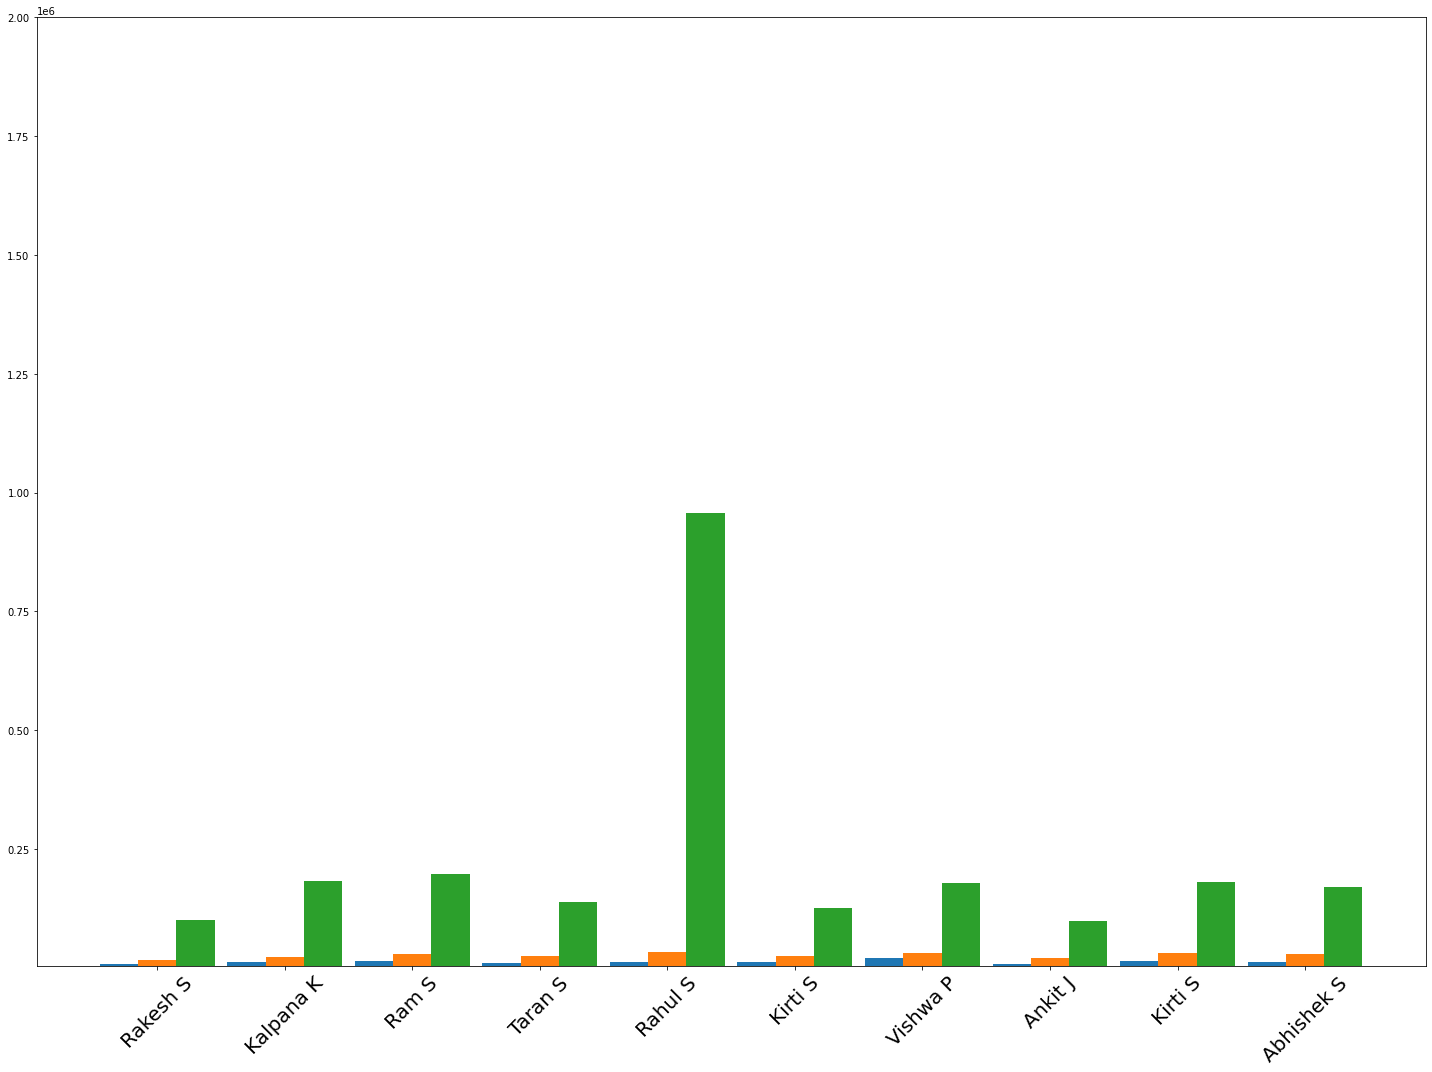

In [83]:
width = 0.3


fig, axs = plt.subplots(1, 1,
                        figsize =(20, 15),
                        tight_layout = True)
plt.ylim([4000,2000000])

axs.bar(required_df['Manager ID'] - width, required_df['Q1 Sales'], width = width)

axs.bar(required_df['Manager ID'], required_df['Q2 Sales'], width = width)

axs.bar(required_df['Manager ID'] + width, required_df['Q3 Sales'], width = width)


## In the x axis in order to map the manger id with the manager name we have to use the labels attribute
plt.xticks(ticks = required_df['Manager ID'], labels = required_df['Manager Name'], fontsize = '20', rotation = 45)

plt.show()

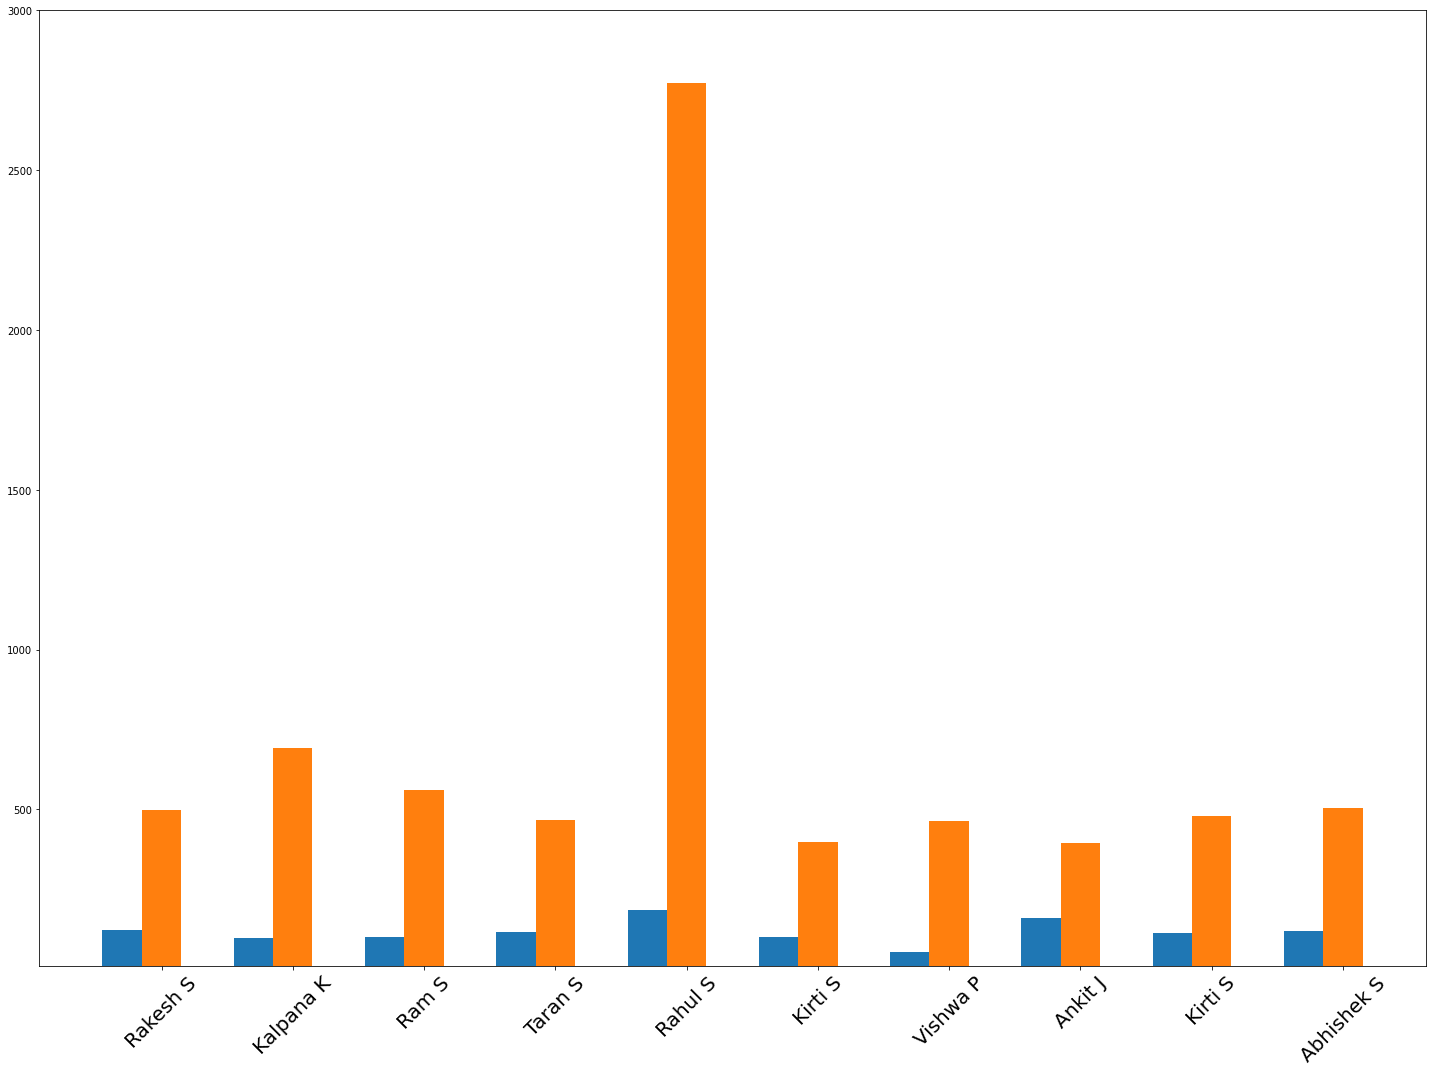

In [91]:
width = 0.3


fig, axs = plt.subplots(1, 1,
                        figsize =(20, 15),
                        tight_layout = True)
plt.ylim([10,3000])

axs.bar(required_df['Manager ID'] - width, required_df['Q2-Q1'], width = width)

axs.bar(required_df['Manager ID'], required_df['Q3-Q2'], width = width)

# axs.bar(required_df['Manager ID'] + width, required_df['Q3 Sales'], width = width)


## In the x axis in order to map the manger id with the manager name we have to use the labels attribute
plt.xticks(ticks = required_df['Manager ID'], labels = required_df['Manager Name'], fontsize = '20', rotation = 45)


plt.show()

<AxesSubplot:xlabel='Q3-Q2', ylabel='Density'>

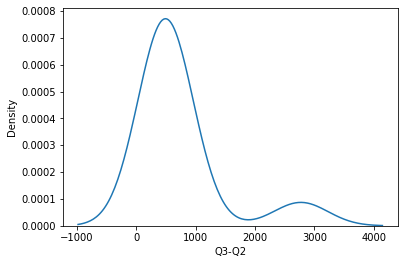

In [92]:
sns.kdeplot(required_df['Q3-Q2'])